# Imports

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing

In [15]:
path = 'train.csv'
df = pd.read_csv(path)
df = df[df['original'] == 1]

# 4-a Imputation & interpolation
df = df.interpolate()
df = df.fillna(df.mean())

# 4-b Data balancing with SMOTE
df['label'] = df['timestamp(day)'].apply(lambda x: 3 if x <= -3 else x)
df_label = df['label']
df_label_before_preprocessing = df_label

df_features = df.drop(columns=['timestamp(day)', 'timestamp(hr)', 'original', 'label'])

smote = SMOTE()

df, df_label = smote.fit_resample(df, df_label)

# EDA


In [16]:
# 5.1 - How many patients are there?

num_patients = df[(df['timestamp(day)']==0) & (df['timestamp(hr)']==0)].shape[0]
print(f"Number of patients: {num_patients}")

Number of patients: 4156


In [17]:
# 5.2 - What are the mean and median value of the label (day)?

mean_label = df_label_before_preprocessing.mean()
median_label = df_label_before_preprocessing.median()
print("Before Preprocessing")
print(f"Mean label : {mean_label}, Median label : {median_label}")


mean_label = df_label.mean()
median_label = df_label.median()
print("After Preprocessing")
print(f"Mean label : {mean_label}, Median label : {median_label}")


Before Preprocessing
Mean label : 0.30953086363480975, Median label : 0.0
After Preprocessing
Mean label : 0.0, Median label : -0.5


In [18]:
# 5.3 - Perform EDA and calculate the statistics of the dataset: mean, std,correlations among features, etc. (e.g.There are 34 features and you have to find the correlations among each feature (34 by 34 correlation matrix)).

desc = df_features.describe()
print(desc)

                   1              2              3              4   
count  175514.000000  175514.000000  175514.000000  175514.000000  \
mean        0.585720      65.514703      65.521874     116.446996   
std         0.488066      14.118796      14.858271      30.224963   
min         0.000000      20.000000       0.000000       0.000000   
25%         0.000000      57.000000      56.000000     102.000000   
50%         1.000000      68.000000      65.000000     114.866071   
75%         1.000000      76.000000      75.000000     130.000000   
max         1.000000      99.000000     802.000000    7652.000000   

                   5              6              7              8   
count  175514.000000  175514.000000  175514.000000  175514.000000  \
mean       97.871270      20.717017      36.997047       0.041479   
std        31.294977       5.040917       9.359795       0.083663   
min         0.000000       0.000000       0.000000       0.000000   
25%        82.000000      18.0000

In [19]:
correlation_matrix = df_features.corr()
print(correlation_matrix)

           1         2         3         4         5         6         7   
1   1.000000  0.008902  0.018387 -0.000075  0.001538  0.042280 -0.001876  \
2   0.008902  1.000000 -0.142100  0.054307 -0.083707 -0.011787 -0.007371   
3   0.018387 -0.142100  1.000000  0.386255  0.066391 -0.021230  0.007872   
4  -0.000075  0.054307  0.386255  1.000000 -0.038902 -0.002388 -0.000629   
5   0.001538 -0.083707  0.066391 -0.038902  1.000000  0.173443  0.013066   
6   0.042280 -0.011787 -0.021230 -0.002388  0.173443  1.000000  0.002462   
7  -0.001876 -0.007371  0.007872 -0.000629  0.013066  0.002462  1.000000   
8  -0.008555  0.015751 -0.026588 -0.015354  0.045165  0.030385 -0.004276   
9  -0.015971 -0.037391 -0.009089 -0.019352  0.052867  0.031944 -0.000428   
10  0.018279 -0.008291 -0.022053 -0.006292  0.087852  0.063474  0.007513   
11  0.026982 -0.022797 -0.058266 -0.051165  0.121599  0.081770 -0.001274   
12  0.026992 -0.029531 -0.065895 -0.052489  0.126510  0.089543 -0.000860   
13  0.020962

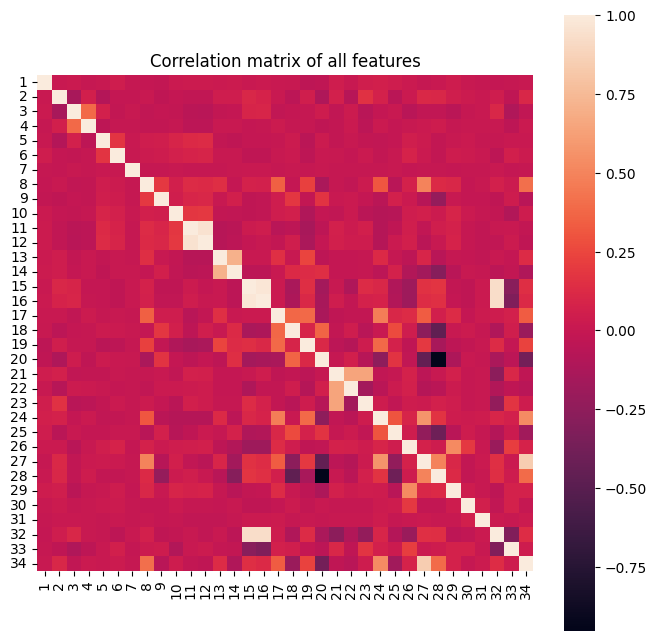

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, square=True)
plt.title('Correlation matrix of all features')
plt.show()

In [21]:
# 5.5 - Perform feature engineering/selection/importance (you may remove no more than 5 features). You can employ any well-known feature engineering methods (PCA, clustering, etc.). Justify your choices and processes.

features = df.drop(columns=['timestamp(day)', 'timestamp(hr)', 'original', 'label'])

rf = RandomForestClassifier()
rf.fit(features, df_label)
importances = rf.feature_importances_

feature_importances = pd.DataFrame({'feature': features.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=True)
print(feature_importances)

features_dropped = features.drop(columns=feature_importances['feature'][:5])
features_dropped


   feature  importance
0        1    0.007700
2        3    0.012786
5        6    0.013565
6        7    0.014306
3        4    0.015056
4        5    0.019260
15      16    0.027038
31      32    0.027158
7        8    0.027533
14      15    0.027974
8        9    0.028613
27      28    0.029965
26      27    0.030461
13      14    0.030958
33      34    0.030971
12      13    0.031426
10      11    0.031468
11      12    0.031680
1        2    0.031707
23      24    0.031714
24      25    0.031741
19      20    0.032071
21      22    0.032831
18      19    0.032840
16      17    0.033006
20      21    0.033295
17      18    0.033536
25      26    0.033764
28      29    0.034415
22      23    0.034452
32      33    0.037983
9       10    0.039644
29      30    0.042416
30      31    0.046666


,2,5,8,9,10,11,12,13,14,15,...,25,26,27,28,29,30,31,32,33,34
0,62.00000,97.871270,0.020000,0.300000,131.775089,9.586726,11.529327,0.020000,0.300000,34.700000,...,7.400000,10.000000,6.100000,78.600000,59.581579,10.900000,120.354606,4.110000,13.600000,7.750000
1,62.00000,106.000000,0.020000,0.283333,131.775089,9.586726,11.529327,0.016667,0.250000,35.100000,...,6.916667,10.016667,6.388333,79.766667,59.581579,10.983333,120.354606,4.140000,13.633333,7.983333
2,62.00000,100.000000,0.020000,0.266667,131.775089,9.586726,11.529327,0.013333,0.200000,35.500000,...,6.433333,10.033333,6.676667,80.933333,59.581579,11.066667,120.354606,4.170000,13.666667,8.216667
3,62.00000,94.000000,0.020000,0.250000,131.775089,9.586726,11.529327,0.010000,0.150000,35.900000,...,5.950000,10.050000,6.965000,82.100000,59.581579,11.150000,120.354606,4.200000,13.700000,8.450000
4,62.00000,98.000000,0.020000,0.233333,131.775089,9.586726,11.529327,0.006667,0.100000,36.300000,...,5.466667,10.066667,7.253333,83.266667,59.581579,11.233333,120.354606,4.230000,13.733333,8.683333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252335,74.00000,68.895438,0.020000,0.240700,191.777054,4.226704,5.133702,0.090000,1.062799,25.243093,...,2.684898,7.944199,8.652469,92.291715,55.558194,10.916064,47.401284,2.706169,14.022099,9.306429
252336,72.00000,91.000000,0.020096,0.501279,19.116368,0.697762,2.492008,0.310000,7.393287,27.938681,...,6.302557,8.202877,2.224060,52.223336,52.406074,10.442317,68.443859,2.874156,15.298721,4.255211
252337,62.00000,121.372850,0.032501,0.275017,309.002463,2.661261,3.629926,0.652507,4.450369,36.750324,...,3.775173,9.475017,15.321694,78.148380,52.315029,10.022909,142.397226,3.832547,12.549989,18.621707
252338,65.00000,93.623494,0.012352,0.382252,184.744117,6.015754,9.509838,0.030592,0.252958,29.482822,...,6.065217,9.158874,9.848574,81.328867,67.989735,10.900000,82.476839,3.431254,14.076194,12.424660


# Model Selection



# Model Tuning



# Model Evaluation / Metrics